| [⬅️ Previous Session](practice_4-1_pandas.ipynb) | [🏠 Course Home](../index.ipynb)

# Session 5-1: Matplotlib 📈

![mpl](./assets/mpl.png)



**Don't forget to start your notebook with a cell containing the import statements you need for the session.**

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

## 📚  <b> Practice 1. </b> 
Recreate the plot below. You do not need to match the colors exactly, but do not rely on <span class="codeb">matplotlib</span> defaults. Note: do not worry about the equation(s); these are included to indicate which functions to plot.

<img src="./assets/mpl_prac1.png" alt="prac1" width="600"/>

/var/folders/5d/fntggs156fl4s1q0xfjbdqrw0000gn/T/ipykernel_12923/473240883.py:2: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)


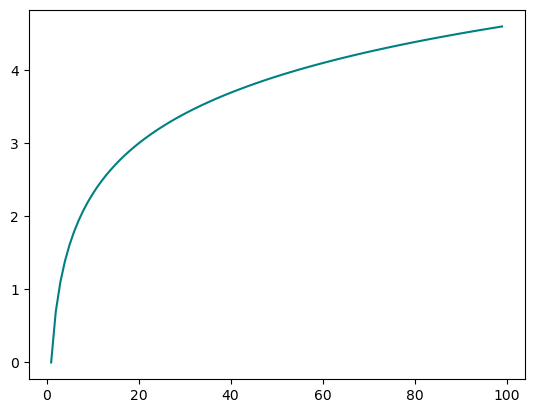

In [25]:
x = range(0, 100)
y = np.log(x)

plt.plot(x, y, color='teal')

## 📚  <b> Practice 2. </b> 
Recreate the plot below. You do not need to match the colors exactly, but do not rely on <span class="codeb">matplotlib</span> defaults. Note: do not worry about the equation(s); these are included to indicate which functions to plot.

<img src="./assets/mpl_prac2.png" alt="prac2" width="600"/>

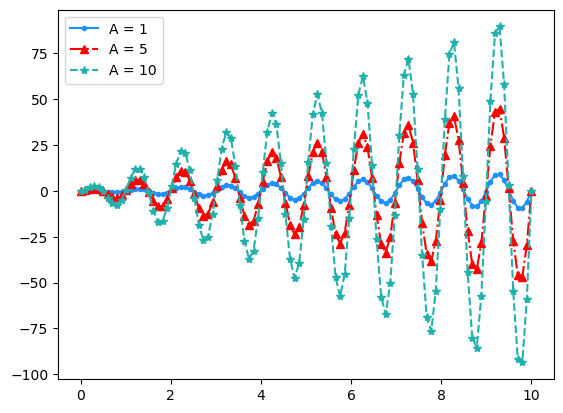

In [26]:
x = np.linspace(0,10, 100)

y1 = x*np.sin(2*np.pi*x)
y5 = 5*x*np.sin(2*np.pi*x)
y10 = 10*x*np.sin(2*np.pi*x)

fig = plt.figure()
plt.plot(x, y1, label = 'A = 1', color = 'dodgerblue', marker = '.')
plt.plot(x, y5, label = 'A = 5', color = 'red', marker = '^', linestyle = '-.')
plt.plot(x, y10, label = 'A = 10', color = 'lightseagreen', marker = '*', linestyle = '--')

plt.legend()

## 📚  <b> Practice 3. </b> 

Import the data from `./data/BSRN_data.csv` and plot the temperature and relative humidity over the month of October 2019 at the BSRN station. Be sure to format the timestamps and include axis labels, a title, and a legend, if necessary.



In [27]:
import matplotlib.dates as mdates

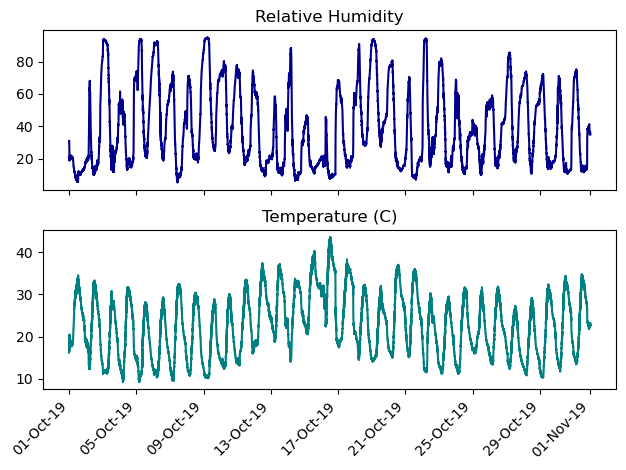

In [28]:
# Import data and change dates to datetime format
bsrn = pd.read_csv('../data/BSRN_GOB_2019-10.csv')
bsrn['DATE'] = pd.to_datetime(bsrn['DATE'])

bsrn.columns
# relative humidity = 'RH'
# temperature = 'T_degC'

fig = plt.figure()
# Add two axes
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# Plot data
ax1.plot(bsrn['DATE'], bsrn['RH'], color = 'darkblue')
ax2.plot(bsrn['DATE'], bsrn['T_degC'], color = 'teal')

# Format
ax1.set_title('Relative Humidity')
ax2.set_title('Temperature (C)')
ax1.set_xticklabels('')

# Format timestamps
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y')) # %b = month as a short string
# Format and rotate ticks
plt.setp(ax2.get_xticklabels(), rotation=45, fontsize=10, ha='right')
ax2.get_xticklabels()

plt.tight_layout()

## 📚 Practice 4.

Saturation vapor pressure, \( $ e^*(T_a) $ \), is the maximum pressure of water vapor that can exist in equilibrium above a flat plane of water at a given temperature. It can be calculated from the Tetens equation:

$$ e^{*}(T_{a}) = a \times exp({\frac{b \cdot T_{a}}{T_{a} + c}}) $$

where $ T_a $ is the air temperature in °C, $ a = 0.611  $ kPa,  $ b = 17.502  $, and  $ c = 240.97 °C  $.

1. Calculate \( $ e^*(T_a) $ \) in kPa for all temperatures in `bsrn`.
1. Plot temperature vs. saturation vapor pressure for the BSRN station. Be sure to format your plot appropriately and include axis labels, a title, and a legend, if necessary.

In [29]:
# Import data
bsrn = pd.read_csv('../data/BSRN_GOB_2019-10.csv',index_col=0,parse_dates=True)

In [30]:
# 1. 
a = 0.611 # kPa
b = 17.502
c = 240.97 # Celcius
bsrn['sat_vap_pressure'] = a * np.exp(
    (b*bsrn['T_degC']) / (bsrn['T_degC'] + c)
    )

Text(0.5, 1.0, 'Saturation vapor pressure as function of temperature')

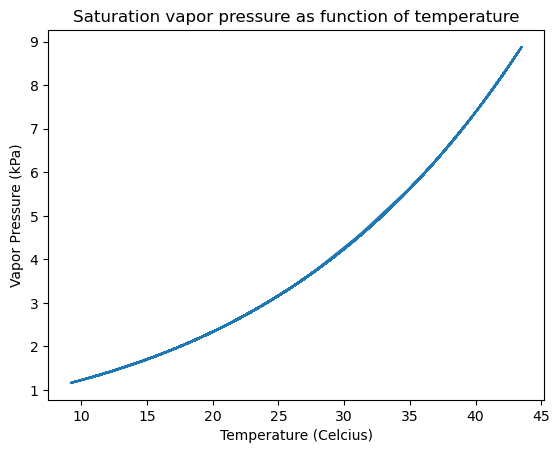

In [31]:
fig = plt.figure()

plt.plot(bsrn['T_degC'], bsrn['sat_vap_pressure'])
plt.xlabel('Temperature (Celcius)')
plt.ylabel('Vapor Pressure (kPa)')
plt.title('Saturation vapor pressure as function of temperature')


1. Compare your plot to Figure 3-1 in Campbell and Norman (1998), included below. Do they look more or less the same?

![cn](./assets/campbell_norman_fig3-1.png)


## 📚  <b> Practice 5. </b> 
The difference between saturation vapor pressure and ambient air pressure is called vapor pressure deficit, $\textit{VPD}$. $\textit{VPD}$ can be calculated from saturation vapor pressure and relative humidity, $h_r$, as follows:
$$ \textit{VPD} \, = \, e^*(T_a) \cdot (1 \, - \, h_r)$$
where $h_r$ is expressed as a fraction.

1. Calculate the vapor pressure deficit for the BSRN data.
1. Calculate the mean hourly $RH$ and $\textit{VPD}$ over the entire month.
1. Plot $RH$ and $\textit{VPD}$ as a function of time of day. (for extra python points, try plotting both variables on one plot using [ax.twinx()](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html))
1. How does relative humidity vary throughout the day? Why?
1. Compare your plot(s) to Figure 3-3 in Campbell and Norman (1998). How do the values of $e^*(T_a)$ and $\textit{VPD}$ for the BSRN station compare to those at constant vapor pressure in Figure 3-3?

![cn](./assets/campbell_norman_fig3-3.png)


In [32]:
# Calculate the vapor pressure deficit for the BSRN data.
# RH is in percent, divide by 100 to make it between 0 and 1
bsrn['RH'] = bsrn['RH'] / 100

# VPD = e *(Ta)(1 - RH)
bsrn['VPD'] = bsrn['sat_vap_pressure'] * (1 - (bsrn['RH']))

,H_m,SWD_Wm2,STD_SWD,DIR_Wm2,STD_DIR,DIF_Wm2,STD_DIF,LWD_Wm2,STD_LWD,SWU_Wm2,LWU_Wm2,T_degC,RH,P_hPa,sat_vap_pressure,VPD
DATE,,,,,,,,,,,,,,,,
2019-10-01 00:00:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.2,0.307,966,1.840158,1.275229
2019-10-01 00:01:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.3,0,383,16.4,0.307,966,1.863759,1.291585
2019-10-01 00:02:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.2,0,383,16.5,0.305,966,1.875658,1.303583
2019-10-01 00:03:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.5,0.304,966,1.875658,1.305458
2019-10-01 00:04:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.8,0.305,966,1.911759,1.328672


In [35]:
#  Calculate the mean hourly RH and VPD over the entire month.

# Start with empty list that will be populated from for loop as a list of lists
hourly_means = []

# Find each unique hour in the datetime (0 - 23)
for hour in bsrn.index.hour.unique():
    # calculate the mean of the specified column when the hour = the current unique hour in the for loop
    avg_RH = bsrn.RH[bsrn.index.hour == hour].mean()
    avg_VPD = bsrn.VPD[bsrn.index.hour == hour].mean()
    # add the hour, mean humidity, and mean vapor pressure as a list to the empty hourly means list
    hourly_means.append([hour, avg_RH, avg_VPD])

# convert the hourly_means list of lists into a data frame with three columns
hourly_mean = pd.DataFrame(hourly_means, columns=['hour', 'rh', 'vpd'])

hourly_mean.head()

,hour,rh,vpd
0,0,0.575977,0.913082
1,1,0.603165,0.823145
2,2,0.631699,0.748051
3,3,0.652017,0.691976
4,4,0.667963,0.628364


/var/folders/5d/fntggs156fl4s1q0xfjbdqrw0000gn/T/ipykernel_12923/2598027172.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])


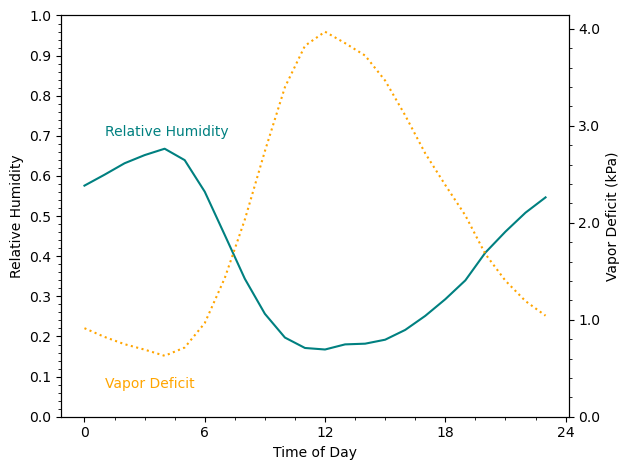

In [51]:
# Plot RH and VPD as a function of time of day.

# Create the figure
fig, ax1 = plt.subplots()

# First plot -- relative humidity over time of day
ax1.plot(hourly_mean['hour'], hourly_mean['rh'], color = 'teal')

# adjust axes range and labels
ax1.set_xlabel('Time of Day')
ax1.set_xticks([0, 6, 12, 18, 24])
ax1.set_xticklabels(['0', '6', '12', '18', '24'])
ax1.set_ylabel('Relative Humidity')
ax1.set_yticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])
ax1.set_yticks([0, 0.1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
ax1.minorticks_on()

# add label to the line
ax1.text(1, 0.7, 'Relative Humidity', color = 'Teal')

# Second plot on the same axes
ax2 = ax1.twinx()

# vapor pressure deficit over time of day
ax2.plot(hourly_mean['hour'], hourly_mean['vpd'], color = 'orange', linestyle = ':')

# adjust axes range and labels
ax2.set_ylabel('Vapor Deficit (kPa)')
ax2.set_yticks([0, 1, 2, 3, 4])
ax2.set_yticklabels(['0.0', '1.0', '2.0', '3.0', '4.0'])
ax2.minorticks_on()

ax2.text(1, 0.3, 'Vapor Deficit', color = 'orange')

# Show plot!
fig.tight_layout()
plt.show()

In [48]:
ax1.minorticks_on?

Signature: ax1.tick_params(axis='both', **kwargs)
Docstring:
Change the appearance of ticks, tick labels, and gridlines.

Tick properties that are not explicitly set using the keyword
arguments remain unchanged unless *reset* is True. For the current
style settings, see `.Axis.get_tick_params`.

Parameters
----------
axis : {'x', 'y', 'both'}, default: 'both'
    The axis to which the parameters are applied.
which : {'major', 'minor', 'both'}, default: 'major'
    The group of ticks to which the parameters are applied.
reset : bool, default: False
    Whether to reset the ticks to defaults before updating them.

Other Parameters
----------------
direction : {'in', 'out', 'inout'}
    Puts ticks inside the Axes, outside the Axes, or both.
length : float
    Tick length in points.
width : float
    Tick width in points.
color : color
    Tick color.
pad : float
    Distance in points between tick and label.
labelsize : float or str
    Tick label font size in points or as a string (e.g.,

<hr style="border-top: 1px solid gray; margin-top: 24px; margin-bottom: 1px"></hr>